## MATH 628 FINAL PROJECT
### Chunlin Shi   Noah Collins

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.read_excel('data.xlsx',engine='openpyxl')
data

,Names Date,Ticker Symbol,North American Industry Classification System,Price or Bid/Ask Average,Shares Outstanding,Returns without Dividends
0,2021-12-31,XOM,324110,61.189999,4233567,0.006580
1,2022-01-03,XOM,324110,63.540001,4233567,0.038405
2,2022-01-04,XOM,324110,65.930000,4233567,0.037614
3,2022-01-05,XOM,324110,66.750000,4233567,0.012437
4,2022-01-06,XOM,324110,68.320000,4233567,0.023521
...,...,...,...,...,...,...
4279,2022-12-23,AVGO,334413,552.429993,418000,-0.001193
4280,2022-12-27,AVGO,334413,553.539978,418000,0.002009
4281,2022-12-28,AVGO,334413,544.890015,418000,-0.015627
4282,2022-12-29,AVGO,334413,557.809998,418000,0.023711


In [2]:
data_ret = data[['Ticker Symbol','Names Date','Returns without Dividends']]
data_ret

,Ticker Symbol,Names Date,Returns without Dividends
0,XOM,2021-12-31,0.006580
1,XOM,2022-01-03,0.038405
2,XOM,2022-01-04,0.037614
3,XOM,2022-01-05,0.012437
4,XOM,2022-01-06,0.023521
...,...,...,...
4279,AVGO,2022-12-23,-0.001193
4280,AVGO,2022-12-27,0.002009
4281,AVGO,2022-12-28,-0.015627
4282,AVGO,2022-12-29,0.023711


In [3]:
data_ret = data_ret.pivot_table(index='Names Date', columns='Ticker Symbol', values='Returns without Dividends')
data_ret

Ticker Symbol,AAL,AMD,AVGO,BAC,BRK,CVX,DAL,EOG,INTC,JPM,LUV,NVDA,SLB,UAL,WFC,XOM
Names Date,,,,,,,,,,,,,,,,
2021-12-31,-0.006087,-0.008612,0.000496,-0.000898,-0.003884,-0.000681,0.001025,-0.003925,-0.004639,-0.000820,0.002809,-0.005915,0.004360,-0.007931,-0.002495,0.006580
2022-01-03,0.043987,0.044058,-0.003141,0.037986,0.007030,0.016276,0.030962,0.026230,0.033204,0.021156,0.027077,0.024141,0.059098,0.039059,0.057316,0.038405
2022-01-04,0.014400,-0.038738,0.011457,0.039194,0.025440,0.018196,0.007446,0.045963,-0.001316,0.037910,0.015000,-0.027589,0.048550,0.016707,0.039819,0.037614
2022-01-05,-0.017876,-0.057264,-0.041614,-0.016879,0.003916,0.006506,-0.007637,-0.018353,0.013737,-0.024132,-0.015002,-0.057562,0.000000,-0.010162,-0.008720,0.012437
2022-01-06,-0.005889,0.000588,-0.009285,0.020136,0.011614,0.008509,-0.004220,0.020513,0.002599,0.010624,-0.002273,0.020794,0.023752,-0.000218,0.025626,0.023521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.011943,0.010335,-0.001193,0.002470,0.011400,0.030916,0.007290,0.034125,0.004621,0.004745,0.017767,-0.008671,0.031135,0.002874,0.007375,0.026445
2022-12-27,-0.014162,-0.019374,0.002009,0.001848,-0.003093,0.012571,-0.007841,0.011255,-0.005749,0.003504,-0.059573,-0.071353,0.009624,-0.004949,0.001464,0.013894
2022-12-28,-0.016760,-0.011064,-0.015627,0.007378,-0.005802,-0.014753,-0.027660,-0.035433,-0.015420,0.005465,-0.051562,-0.006019,-0.016822,-0.023822,0.001949,-0.016426


In [4]:
data_ret.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-12-31 to 2022-12-30
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAL     252 non-null    float64
 1   AMD     252 non-null    float64
 2   AVGO    252 non-null    float64
 3   BAC     252 non-null    float64
 4   BRK     252 non-null    float64
 5   CVX     252 non-null    float64
 6   DAL     252 non-null    float64
 7   EOG     252 non-null    float64
 8   INTC    252 non-null    float64
 9   JPM     252 non-null    float64
 10  LUV     252 non-null    float64
 11  NVDA    252 non-null    float64
 12  SLB     252 non-null    float64
 13  UAL     252 non-null    float64
 14  WFC     252 non-null    float64
 15  XOM     252 non-null    float64
dtypes: float64(16)
memory usage: 33.5 KB


## From above, we can see that there is no null values for the return data
## We then standardize the return data

In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_ret)
scaled_data = pd.DataFrame(scaled_data)
scaled_data.columns = data_ret.columns

scaled_data

Ticker Symbol,AAL,AMD,AVGO,BAC,BRK,CVX,DAL,EOG,INTC,JPM,LUV,NVDA,SLB,UAL,WFC,XOM
0,-0.150503,-0.160448,0.038864,0.003356,-0.293354,-0.124574,0.044680,-0.205590,-0.094290,-0.017764,0.147358,-0.098446,0.049494,-0.231060,-0.098832,0.180330
1,1.266021,1.213171,-0.116372,1.907877,0.485604,0.693871,1.082119,0.861953,1.481022,1.148928,1.176709,0.659338,1.798101,1.144038,2.691561,1.625934
2,0.429058,-0.946130,0.506723,1.967067,1.799625,0.786510,0.267204,1.560554,0.044043,2.038400,0.664441,-0.644901,1.461129,0.489938,1.875261,1.590008
3,-0.483981,-1.429267,-1.758524,-0.779349,0.263372,0.222309,-0.255488,-0.716404,0.670665,-1.255357,-0.608103,-1.400616,-0.089769,-0.296348,-0.389281,0.446395
4,-0.144880,0.079468,-0.378600,1.033580,0.812832,0.319004,-0.137078,0.659554,0.206991,0.589810,-0.068206,0.574961,0.668986,-0.005357,1.213130,0.949832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.359542,0.333677,-0.033247,0.168326,0.797544,1.400451,0.261814,1.141461,0.291160,0.277698,0.781784,-0.167926,0.904807,0.085125,0.361615,1.082671
248,-0.378923,-0.441117,0.103450,0.137853,-0.236843,0.515021,-0.262534,0.331802,-0.140527,0.211809,-2.498588,-1.748327,0.217678,-0.143796,0.085868,0.512559
249,-0.452407,-0.224393,-0.649296,0.408711,-0.430191,-0.803724,-0.949329,-1.321064,-0.543107,0.315934,-2.158770,-0.101080,-0.627154,-0.696081,0.108500,-0.864694
250,0.894238,1.001959,1.029743,0.600364,1.338716,0.273746,0.810786,0.275149,1.190850,0.330386,1.596218,1.069183,0.098498,0.495428,0.255825,0.225116


## Now we can do PCA analysis

In [6]:
pca = PCA(n_components=3)
pca.fit(scaled_data)

PCA(n_components=3)

## We extract the second and the third eigenvector from PCA

In [7]:
eigenvectors = pca.components_
second_eigenvector = eigenvectors[1]
third_eigenvector = eigenvectors[2]

In [8]:
correlation_matrix = scaled_data.corr()
correlation_matrix

Ticker Symbol,AAL,AMD,AVGO,BAC,BRK,CVX,DAL,EOG,INTC,JPM,LUV,NVDA,SLB,UAL,WFC,XOM
Ticker Symbol,,,,,,,,,,,,,,,,
AAL,1.000000,0.606493,0.594144,0.550496,0.529382,0.157999,0.924746,0.132858,0.514597,0.548905,0.842430,0.622287,0.185075,0.928827,0.576018,0.125324
AMD,0.606493,1.000000,0.780958,0.559184,0.588605,0.303841,0.576782,0.264088,0.741271,0.519383,0.552735,0.887174,0.248181,0.554975,0.527571,0.259137
AVGO,0.594144,0.780958,1.000000,0.554185,0.613924,0.296872,0.593796,0.273659,0.750160,0.564049,0.573072,0.824741,0.261785,0.552298,0.531020,0.265218
BAC,0.550496,0.559184,0.554185,1.000000,0.707732,0.365815,0.595608,0.344822,0.507697,0.895891,0.537038,0.547887,0.338610,0.548971,0.865869,0.315299
BRK,0.529382,0.588605,0.613924,0.707732,1.000000,0.469095,0.568930,0.412894,0.596912,0.709166,0.519312,0.578304,0.399552,0.520238,0.698938,0.431941
CVX,0.157999,0.303841,0.296872,0.365815,0.469095,1.000000,0.190125,0.815066,0.296874,0.303311,0.200572,0.273685,0.774093,0.139055,0.307397,0.873425
DAL,0.924746,0.576782,0.593796,0.595608,0.568930,0.190125,1.000000,0.156082,0.508122,0.594361,0.865357,0.596280,0.191830,0.923427,0.619314,0.157380
EOG,0.132858,0.264088,0.273659,0.344822,0.412894,0.815066,0.156082,1.000000,0.261002,0.300045,0.180979,0.238775,0.748056,0.132629,0.290887,0.837306
INTC,0.514597,0.741271,0.750160,0.507697,0.596912,0.296874,0.508122,0.261002,1.000000,0.519479,0.500612,0.747413,0.276862,0.476877,0.519873,0.303884


In [9]:
eigenvalues = np.linalg.eigvals(correlation_matrix)
eigenvalues

array([8.52702392, 2.98514649, 1.23028626, 1.12078152, 0.34025521,
       0.30711004, 0.06357353, 0.06739485, 0.07830166, 0.10535933,
       0.11858138, 0.1726956 , 0.18402044, 0.24722549, 0.23754924,
       0.21469504])

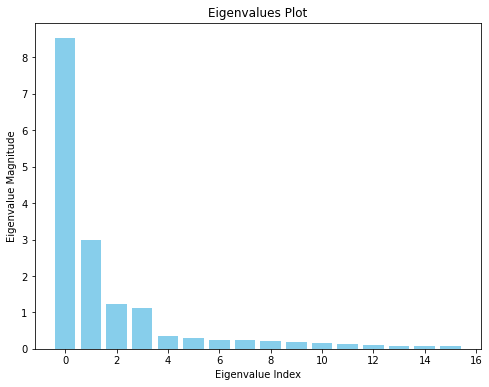

In [10]:
sorted_eigenvalues = np.sort(eigenvalues)[::-1]  # Reverse the order

# Plotting the eigenvalues
plt.figure(figsize=(8, 6))
plt.bar(range(len(sorted_eigenvalues)), sorted_eigenvalues, color='skyblue')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue Magnitude')
plt.title('Eigenvalues Plot')
plt.show()

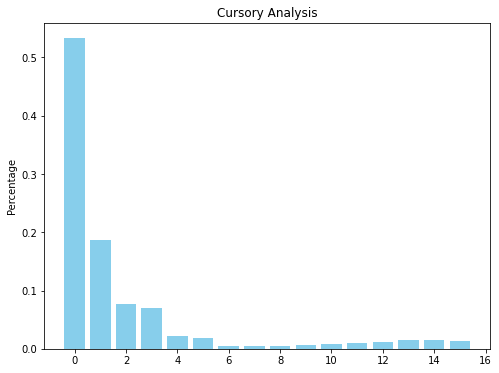

In [11]:
total_variance = np.sum(eigenvalues)
explained_variance_ratio = eigenvalues / total_variance

# Plotting the eigenvalues
plt.figure(figsize=(8, 6))
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio, color='skyblue')
plt.ylabel('Percentage')
plt.title('Cursory Analysis')
plt.show()

## We calculate the cumulative return of eigenportfolio

In [12]:
cov_matrix = np.cov(scaled_data, rowvar=False)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Select top eigenportfolio (e.g., first eigenvector)
top_eigenvector = eigenvectors[:, 0]  # Replace '0' with the index of the desired eigenvector

# Construct eigenportfolio by normalizing weights
eigenportfolio = top_eigenvector / np.sum(top_eigenvector)
eigenportfolio_returns = np.dot(data_ret, eigenportfolio)

cumulative_return = np.cumprod(1 + eigenportfolio_returns) - 1

cumulative_return = pd.DataFrame(cumulative_return)
cumulative_return

,0
0,-0.002287
1,0.028602
2,0.045073
3,0.027664
4,0.035953
...,...
247,-0.126009
248,-0.134971
249,-0.147446
250,-0.130102


## Now we calculate the cumulative return of market cap weighted portfolio

In [13]:
mkt_cap = data[['Ticker Symbol','Names Date','Price or Bid/Ask Average','Shares Outstanding','Returns without Dividends']]
mkt_cap

,Ticker Symbol,Names Date,Price or Bid/Ask Average,Shares Outstanding,Returns without Dividends
0,XOM,2021-12-31,61.189999,4233567,0.006580
1,XOM,2022-01-03,63.540001,4233567,0.038405
2,XOM,2022-01-04,65.930000,4233567,0.037614
3,XOM,2022-01-05,66.750000,4233567,0.012437
4,XOM,2022-01-06,68.320000,4233567,0.023521
...,...,...,...,...,...
4279,AVGO,2022-12-23,552.429993,418000,-0.001193
4280,AVGO,2022-12-27,553.539978,418000,0.002009
4281,AVGO,2022-12-28,544.890015,418000,-0.015627
4282,AVGO,2022-12-29,557.809998,418000,0.023711


In [14]:
shr = pd.Series(mkt_cap.groupby('Ticker Symbol')['Shares Outstanding'].sum()/252)
shr

Ticker Symbol
AAL     6.494009e+05
AMD     1.567547e+06
AVGO    4.087312e+05
BAC     8.070363e+06
BRK     1.296293e+06
CVX     1.951552e+06
DAL     6.407667e+05
EOG     5.857664e+05
INTC    4.100060e+06
JPM     2.942416e+06
LUV     5.928831e+05
NVDA    2.491785e+06
SLB     1.412687e+06
UAL     3.261760e+05
WFC     3.826443e+06
XOM     4.201088e+06
Name: Shares Outstanding, dtype: float64

In [15]:
mkt_ret = mkt_cap[['Ticker Symbol','Names Date','Price or Bid/Ask Average']]
mkt_ret = mkt_ret.pivot_table(index='Names Date', columns='Ticker Symbol', values='Price or Bid/Ask Average')
mkt_ret

Ticker Symbol,AAL,AMD,AVGO,BAC,BRK,CVX,DAL,EOG,INTC,JPM,LUV,NVDA,SLB,UAL,WFC,XOM
Names Date,,,,,,,,,,,,,,,,
2021-12-31,17.959999,143.899994,665.409973,44.490002,225480.500000,117.349998,39.080002,88.830002,51.500000,158.350006,42.840000,294.109985,29.950001,43.779999,47.980000,61.189999
2022-01-03,18.750000,150.240005,663.320007,46.180000,227300.395004,119.260002,40.290001,91.160004,53.209999,161.699997,44.000000,301.209991,31.719999,45.490002,50.730000,63.540001
2022-01-04,19.020000,144.419998,670.919983,47.990002,233016.764999,121.430000,40.590000,95.349998,53.139999,167.830002,44.660000,292.899994,33.259998,46.250000,52.750000,65.930000
2022-01-05,18.680000,136.149994,643.000000,47.180000,233792.085007,122.220001,40.279999,93.599998,53.869999,163.779999,43.990002,276.040009,33.259998,45.779999,52.290001,66.750000
2022-01-06,18.570000,136.229996,637.030029,48.130001,236733.110001,123.260002,40.110001,95.519997,54.009998,165.520004,43.889999,281.779999,34.049999,45.770000,53.630001,68.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,12.710000,64.519997,552.429993,32.470001,231853.244995,177.399994,33.160000,130.610001,26.090000,131.279999,36.090000,152.059998,52.990002,38.389999,40.980000,108.680000
2022-12-27,12.530000,63.270000,553.539978,32.529999,231130.274994,179.630005,32.900002,132.080002,25.940001,131.740005,33.939999,141.210007,53.500000,38.200001,41.040001,110.190002
2022-12-28,12.320000,62.570000,544.890015,32.770000,230051.714996,176.979996,31.990000,127.400002,25.540001,132.460007,32.189999,140.360001,52.599998,37.290001,41.119999,108.379997


In [16]:
market_caps = mkt_ret * shr
market_caps

Ticker Symbol,AAL,AMD,AVGO,BAC,BRK,CVX,DAL,EOG,INTC,JPM,LUV,NVDA,SLB,UAL,WFC,XOM
Names Date,,,,,,,,,,,,,,,,
2021-12-31,1.166324e+07,2.255700e+08,2.719738e+08,3.590505e+08,2.922889e+11,2.290147e+08,2.504116e+07,5.203363e+07,2.111531e+08,4.659316e+08,2.539911e+07,7.328589e+08,4.230997e+07,1.427998e+07,1.835927e+08,2.570646e+08
2022-01-03,1.217627e+07,2.355083e+08,2.711196e+08,3.726894e+08,2.946480e+11,2.327421e+08,2.581649e+07,5.339846e+07,2.181642e+08,4.757887e+08,2.608686e+07,7.505506e+08,4.481042e+07,1.483775e+07,1.941155e+08,2.669371e+08
2022-01-04,1.235161e+07,2.263852e+08,2.742259e+08,3.872967e+08,3.020581e+11,2.369770e+08,2.600872e+07,5.585282e+07,2.178772e+08,4.938257e+08,2.647816e+07,7.298438e+08,4.698596e+07,1.508564e+07,2.018449e+08,2.769777e+08
2022-01-05,1.213081e+07,2.134215e+08,2.628142e+08,3.807597e+08,3.030631e+11,2.385187e+08,2.581008e+07,5.482773e+07,2.208702e+08,4.819089e+08,2.608093e+07,6.878324e+08,4.698596e+07,1.493234e+07,2.000847e+08,2.804226e+08
2022-01-06,1.205937e+07,2.135469e+08,2.603740e+08,3.884266e+08,3.068756e+11,2.405483e+08,2.570115e+07,5.595240e+07,2.214443e+08,4.870288e+08,2.602164e+07,7.021352e+08,4.810198e+07,1.492907e+07,2.052122e+08,2.870183e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,8.253885e+06,1.011381e+08,2.257954e+08,2.620447e+08,3.005498e+11,3.462054e+08,2.124782e+07,7.650694e+07,1.069706e+08,3.862804e+08,2.139715e+07,3.789008e+08,7.485827e+07,1.252190e+07,1.568076e+08,4.565743e+08
2022-12-27,8.136993e+06,9.917871e+07,2.262491e+08,2.625289e+08,2.996126e+11,3.505573e+08,2.108122e+07,7.736802e+07,1.063556e+08,3.876339e+08,2.012245e+07,3.518650e+08,7.557874e+07,1.245992e+07,1.570372e+08,4.629179e+08
2022-12-28,8.000619e+06,9.808142e+07,2.227135e+08,2.644658e+08,2.982145e+11,3.453857e+08,2.049813e+07,7.462663e+07,1.047155e+08,3.897525e+08,1.908491e+07,3.497470e+08,7.430732e+07,1.216310e+07,1.573433e+08,4.553139e+08


In [17]:
weights = market_caps.div(market_caps.sum(axis=1), axis=0)
weights

Ticker Symbol,AAL,AMD,AVGO,BAC,BRK,CVX,DAL,EOG,INTC,JPM,LUV,NVDA,SLB,UAL,WFC,XOM
Names Date,,,,,,,,,,,,,,,,
2021-12-31,0.000039,0.000764,0.000921,0.001215,0.989482,0.000775,0.000085,0.000176,0.000715,0.001577,0.000086,0.002481,0.000143,0.000048,0.000622,0.000870
2022-01-03,0.000041,0.000791,0.000910,0.001251,0.989274,0.000781,0.000087,0.000179,0.000732,0.001597,0.000088,0.002520,0.000150,0.000050,0.000652,0.000896
2022-01-04,0.000040,0.000742,0.000898,0.001269,0.989426,0.000776,0.000085,0.000183,0.000714,0.001618,0.000087,0.002391,0.000154,0.000049,0.000661,0.000907
2022-01-05,0.000040,0.000697,0.000858,0.001243,0.989721,0.000779,0.000084,0.000179,0.000721,0.001574,0.000085,0.002246,0.000153,0.000049,0.000653,0.000916
2022-01-06,0.000039,0.000689,0.000840,0.001253,0.989717,0.000776,0.000083,0.000180,0.000714,0.001571,0.000084,0.002264,0.000155,0.000048,0.000662,0.000926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.000027,0.000334,0.000745,0.000864,0.991307,0.001142,0.000070,0.000252,0.000353,0.001274,0.000071,0.001250,0.000247,0.000041,0.000517,0.001506
2022-12-27,0.000027,0.000328,0.000749,0.000869,0.991334,0.001160,0.000070,0.000256,0.000352,0.001283,0.000067,0.001164,0.000250,0.000041,0.000520,0.001532
2022-12-28,0.000027,0.000326,0.000740,0.000879,0.991369,0.001148,0.000068,0.000248,0.000348,0.001296,0.000063,0.001163,0.000247,0.000040,0.000523,0.001514


In [18]:
daily_mkt_ret = data[['Ticker Symbol','Names Date','Returns without Dividends']]
daily_mkt_ret = daily_mkt_ret.pivot_table(index='Names Date', columns='Ticker Symbol', values='Returns without Dividends')
daily_mkt_ret = (daily_mkt_ret * weights).sum(axis=1)
daily_mkt_ret

Names Date
2021-12-31   -0.003867
2022-01-03    0.007260
2022-01-04    0.025291
2022-01-05    0.003626
2022-01-06    0.011630
                ...   
2022-12-23    0.011400
2022-12-27   -0.003113
2022-12-28   -0.005826
2022-12-29    0.018955
2022-12-30   -0.000231
Length: 252, dtype: float64

In [19]:
daily_mkt_ret = daily_mkt_ret.reset_index(drop=True)
daily_mkt_ret = np.cumprod(1 + daily_mkt_ret) - 1
daily_mkt_ret = pd.DataFrame(daily_mkt_ret)
daily_mkt_ret

,0
0,-0.003867
1,0.003365
2,0.028741
3,0.032471
4,0.044479
...,...
247,0.022213
248,0.019031
249,0.013095
250,0.032298


## We plot the cumulative return of eigenportfolio and market cap weighted portfolio in the same graph

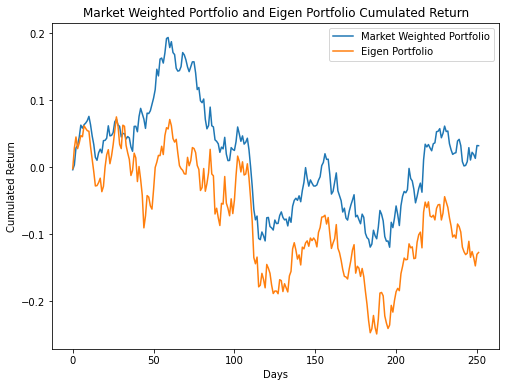

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(daily_mkt_ret, label='Market Weighted Portfolio')
plt.plot(cumulative_return, label='Eigen Portfolio')
plt.xlabel('Days')
plt.ylabel('Cumulated Return')
plt.title('Market Weighted Portfolio and Eigen Portfolio Cumulated Return')
plt.legend()
plt.show()

In [21]:
signs = pd.DataFrame({'Stock': scaled_data.columns, 
                      'Second_Eigenvector': second_eigenvector,
                      'Third_Eigenvector': third_eigenvector})

In [22]:
signs 

,Stock,Second_Eigenvector,Third_Eigenvector
0,AAL,0.218933,-0.210610
1,AMD,0.073633,0.412608
2,AVGO,0.069199,0.376026
3,BAC,0.000662,-0.165386
4,BRK,-0.064327,-0.001756
5,CVX,-0.451722,-0.026942
6,DAL,0.203492,-0.259594
7,EOG,-0.450143,-0.049374
8,INTC,0.034908,0.417784
9,JPM,0.025836,-0.158595


## We extract industry code from the original table

In [23]:
industry_data = data[['Ticker Symbol', 'North American Industry Classification System']].drop_duplicates()
industry_data = industry_data.rename(columns={'Ticker Symbol': 'Stock'})
industry_data = industry_data.sort_values(by='North American Industry Classification System')
industry_data = industry_data.reset_index(drop=True)
industry_data

,Stock,North American Industry Classification System
0,EOG,211120
1,SLB,213112
2,XOM,324110
3,INTC,334413
4,AMD,334413
5,NVDA,334413
6,AVGO,334413
7,CVX,447190
8,AAL,481111
9,LUV,481111


In [24]:
signs_with_industry = signs.merge(industry_data, on='Stock')
signs_with_industry = signs_with_industry.sort_values('North American Industry Classification System').reset_index(drop = True)
signs_with_industry

,Stock,Second_Eigenvector,Third_Eigenvector,North American Industry Classification System
0,EOG,-0.450143,-0.049374,211120
1,SLB,-0.423821,-0.103848,213112
2,XOM,-0.468001,-0.032569,324110
3,AMD,0.073633,0.412608,334413
4,AVGO,0.069199,0.376026,334413
5,INTC,0.034908,0.417784,334413
6,NVDA,0.098801,0.420549,334413
7,CVX,-0.451722,-0.026942,447190
8,AAL,0.218933,-0.210610,481111
9,DAL,0.203492,-0.259594,481111


#### From table above, we can see that within the same industry group, the signs of second eigenvector and the third eigenvector are the same